In [ ]:
!pip --q install gymnasium[toy_text]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 2.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import random
import gymnasium as gym

# step types
STEPTYPE_FIRST = 0
STEPTYPE_MID = 1
STEPTYPE_LAST = 2

Q = np.random.uniform(size=(500, 6))

### Number of Observation space:500


1.   Taxi location :25
2.   Passenger location :5
3.   Target location :4


### Number of Action :6


0.    : Move south (down)

1.    : Move north (up)

2.    : Move east (right)

3.    : Move west (left)

4.    : Pickup passenger

5.    : Drop off passenger



In [ ]:
env = gym.make('Taxi-v3', render_mode='rgb_array')

In [ ]:
obs, _ = env.reset()

array([[[110, 109, 106],
        [110, 109, 106],
        [124, 122, 122],
        ...,
        [108, 111, 109],
        [108, 111, 109],
        [118, 119, 119]],

       [[110, 109, 106],
        [110, 109, 106],
        [124, 122, 122],
        ...,
        [108, 111, 109],
        [108, 111, 109],
        [118, 119, 119]],

       [[114, 116, 115],
        [114, 116, 115],
        [126, 127, 126],
        ...,
        [112, 113, 111],
        [112, 113, 111],
        [118, 117, 115]],

       ...,

       [[116, 115, 116],
        [116, 115, 116],
        [106, 107, 108],
        ...,
        [113, 115, 114],
        [113, 115, 114],
        [117, 114, 117]],

       [[116, 115, 116],
        [116, 115, 116],
        [106, 107, 108],
        ...,
        [113, 115, 114],
        [113, 115, 114],
        [117, 114, 117]],

       [[115, 112, 112],
        [115, 112, 112],
        [119, 119, 117],
        ...,
        [123, 119, 118],
        [123, 119, 118],
        [114, 114, 117]]], dtype=uint8)
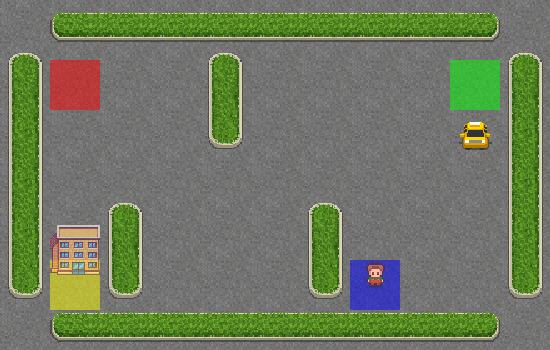

In [ ]:
env.render()

In [ ]:
# wrapper for gym's blackjack environment
def generate_start_step():
    return { 'observation': env.reset()[0], 'reward': 0., 'step_type': STEPTYPE_FIRST }

def generate_next_step(step, action):
    obs, reward, done, _, info = env.step(action)
    step_type = STEPTYPE_LAST if done else STEPTYPE_MID
    return { 'observation': obs, 'reward': reward, 'step_type': step_type }

In [ ]:
epsilon = 0.1

def get_eps_soft_action(step):
    # epsilon-soft greedy policy
    if random.random() < epsilon:
        return np.random.choice(env.action_space.n, 1)[0] # 6가지 행동중 랜덤으로 하나 뽑음
    else:
        observ = step['observation']
        return np.argmax(Q[observ])

In [ ]:
def get_greedy_action(step):
    observ = step['observation']
    return np.argmax(Q[observ])

In [ ]:
def get_random_action(step):
    return random.randint(0, env.action_space.n-1)

behavior_prob_hit = 1. / float(env.action_space.n)

In [ ]:
# return true if (observ, action) exists in epi
def in_episode(epi, observ, action):
    for s, a in zip(*epi):
        if s['observation'] == observ and a == action:
            return True
    return False

In [ ]:
maxiter = 100000
gamma = 1
epsilon = 0.3
lr_rate = 0.8

Q = np.random.uniform(size=(env.observation_space.n, env.action_space.n))

for _ in range(maxiter):
    # starting step
    step = generate_start_step()
    action = get_random_action(step)
    done = False
    while not done:
        next_step = generate_next_step(step, action)

        if next_step['step_type'] == STEPTYPE_LAST:
            state = step['observation']
            idx1 = (state, action)
            Q[idx1] = Q[idx1] + lr_rate * (next_step['reward'] - Q[idx1])
            done = True
        else:
            best_action = get_greedy_action(next_step)

            state = step['observation']
            next_state = next_step['observation']
            idx1 = (state, action)
            idx2 = (next_state, best_action)
            Q[idx1] = Q[idx1] + lr_rate * ((next_step['reward'] + gamma * Q[idx2]) - Q[idx1])

            next_action = get_eps_soft_action(step)

            step = next_step
            action = next_action


# Play An Episode with Animated GIF

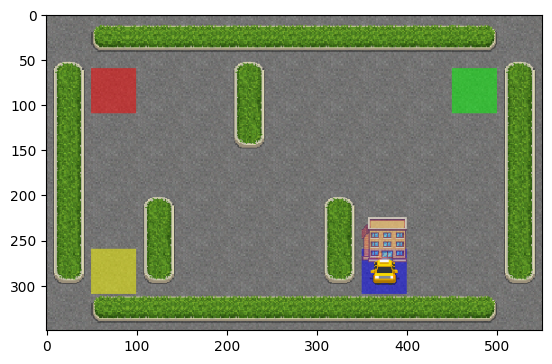

In [ ]:
import time, sys
from IPython.display import clear_output
from matplotlib import animation
import matplotlib.pyplot as plt
import glob
import imageio

anim_file = 'taxi.gif'

turn =  0
step = generate_start_step()
plt.imshow(env.render())
plt.savefig('image_at_turn_{:04d}.png'.format(turn))

for timestep in range(1, 200):
    turn += 1
    action = get_greedy_action(step)
    step = generate_next_step(step, action)
    plt.imshow(env.render())
    plt.savefig('image_at_turn_{:04d}.png'.format(turn))

    if step['step_type'] == STEPTYPE_LAST:
        break

In [ ]:
# generate animated gif file
with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('image_at_turn_*.png')
    filenames = sorted(filenames)
    for filename in filenames:
        #print(filename)
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

<ipython-input-13-ac3fa8ec4953>:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
<ipython-input-13-ac3fa8ec4953>:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


In [ ]:
!ls

image_at_turn_0000.png	image_at_turn_0003.png	image_at_turn_0006.png	image_at_turn_0009.png
image_at_turn_0001.png	image_at_turn_0004.png	image_at_turn_0007.png	sample_data
image_at_turn_0002.png	image_at_turn_0005.png	image_at_turn_0008.png	taxi.gif


In [ ]:
  from google.colab import drive
  drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp taxi.gif '/content/drive/MyDrive/SKT_FLY_AI /5주차'